# Fish Species Image Classification

## Splitting the Data

In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
import io

c:\Users\fasya\tensorflow\tf-env\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


### Dataset Sudah Tersedia

In [2]:
# Dataset sudah ada di FishImgDataset dengan train, test, val
# Kita akan menggunakan yang sudah ada

# Path dataset
dataset_dir = "./FishImgDataset"
train_dir = os.path.join(dataset_dir, "train")
val_dir = os.path.join(dataset_dir, "val")
test_dir = os.path.join(dataset_dir, "test")

In [3]:
# Verifikasi struktur dataset
print("Kelas ikan yang tersedia:")
fish_classes = sorted(os.listdir(train_dir))
print(f"Jumlah kelas: {len(fish_classes)}")
print(fish_classes)

Kelas ikan yang tersedia:
Jumlah kelas: 31
['Bangus', 'Big Head Carp', 'Black Spotted Barb', 'Catfish', 'Climbing Perch', 'Fourfinger Threadfin', 'Freshwater Eel', 'Glass Perchlet', 'Goby', 'Gold Fish', 'Gourami', 'Grass Carp', 'Green Spotted Puffer', 'Indian Carp', 'Indo-Pacific Tarpon', 'Jaguar Gapote', 'Janitor Fish', 'Knifefish', 'Long-Snouted Pipefish', 'Mosquito Fish', 'Mudfish', 'Mullet', 'Pangasius', 'Perch', 'Scat Fish', 'Silver Barb', 'Silver Carp', 'Silver Perch', 'Snakehead', 'Tenpounder', 'Tilapia']


In [4]:
# Hitung jumlah gambar per split
for split_name, split_path in [("Train", train_dir), ("Validation", val_dir), ("Test", test_dir)]:
    total_images = 0
    print(f"\n{split_name} set:")
    for fish_class in sorted(os.listdir(split_path)):
        class_path = os.path.join(split_path, fish_class)
        if os.path.isdir(class_path):
            count = len(os.listdir(class_path))
            total_images += count
            print(f"  {fish_class}: {count} gambar")
    print(f"Total {split_name}: {total_images} gambar")


Train set:
  Bangus: 171 gambar
  Big Head Carp: 201 gambar
  Black Spotted Barb: 200 gambar
  Catfish: 314 gambar
  Climbing Perch: 152 gambar
  Fourfinger Threadfin: 192 gambar
  Freshwater Eel: 273 gambar
  Glass Perchlet: 399 gambar
  Goby: 607 gambar
  Gold Fish: 206 gambar
  Gourami: 312 gambar
  Grass Carp: 1222 gambar
  Green Spotted Puffer: 110 gambar
  Indian Carp: 262 gambar
  Indo-Pacific Tarpon: 186 gambar
  Jaguar Gapote: 229 gambar
  Janitor Fish: 286 gambar
  Knifefish: 319 gambar
  Long-Snouted Pipefish: 256 gambar
  Mosquito Fish: 256 gambar
  Mudfish: 191 gambar
  Mullet: 174 gambar
  Pangasius: 193 gambar
  Perch: 293 gambar
  Scat Fish: 154 gambar
  Silver Barb: 329 gambar
  Silver Carp: 238 gambar
  Silver Perch: 285 gambar
  Snakehead: 232 gambar
  Tenpounder: 277 gambar
  Tilapia: 302 gambar
Total Train: 8821 gambar

Validation set:
  Bangus: 52 gambar
  Big Head Carp: 63 gambar
  Black Spotted Barb: 63 gambar
  Catfish: 97 gambar
  Climbing Perch: 48 gambar
  

## EDA (Exploratory Data Analysis)

### Identifying Class Imbalance

In [5]:
dataset_dir = "./FishImgDataset"

Jumlah gambar per kelas (train set): {'Bangus': 171, 'Big Head Carp': 201, 'Black Spotted Barb': 200, 'Catfish': 314, 'Climbing Perch': 152, 'Fourfinger Threadfin': 192, 'Freshwater Eel': 273, 'Glass Perchlet': 399, 'Goby': 607, 'Gold Fish': 206, 'Gourami': 312, 'Grass Carp': 1222, 'Green Spotted Puffer': 110, 'Indian Carp': 262, 'Indo-Pacific Tarpon': 186, 'Jaguar Gapote': 229, 'Janitor Fish': 286, 'Knifefish': 319, 'Long-Snouted Pipefish': 256, 'Mosquito Fish': 256, 'Mudfish': 191, 'Mullet': 174, 'Pangasius': 193, 'Perch': 293, 'Scat Fish': 154, 'Silver Barb': 329, 'Silver Carp': 238, 'Silver Perch': 285, 'Snakehead': 232, 'Tenpounder': 277, 'Tilapia': 302}
Jumlah gambar per kelas (val set): {'Bangus': 52, 'Big Head Carp': 63, 'Black Spotted Barb': 63, 'Catfish': 97, 'Climbing Perch': 48, 'Fourfinger Threadfin': 60, 'Freshwater Eel': 84, 'Glass Perchlet': 124, 'Goby': 189, 'Gold Fish': 65, 'Gourami': 97, 'Grass Carp': 378, 'Green Spotted Puffer': 34, 'Indian Carp': 81, 'Indo-Pacific 

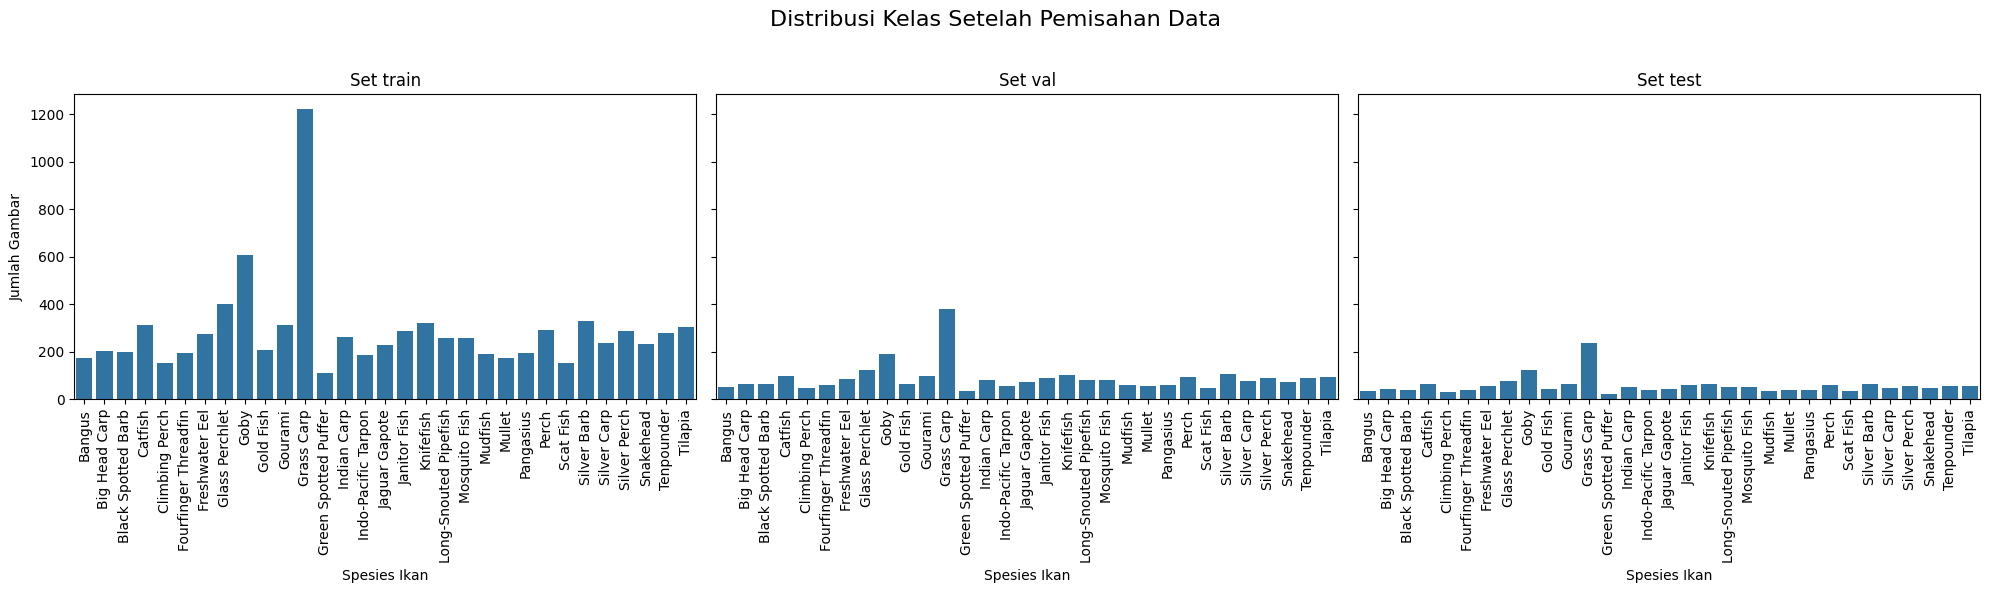

In [6]:
splits = ['train', 'val', 'test']
fig, axes = plt.subplots(1, len(splits), figsize=(20, 6), sharey=True)
fig.suptitle("Distribusi Kelas Setelah Pemisahan Data", fontsize=16)
# Mendapatkan categories dari direktori train
categories_split = sorted(os.listdir(os.path.join(dataset_dir, "train")))

for i, split in enumerate(splits):
    split_path_dir = os.path.join(dataset_dir, split)
    class_counts_split = {}
    if os.path.exists(split_path_dir):
        for category in categories_split:
            category_path = os.path.join(split_path_dir, category)
            if os.path.isdir(category_path):
                class_counts_split[category] = len(os.listdir(category_path))

    sns.barplot(ax=axes[i], x=list(class_counts_split.keys()), y=list(class_counts_split.values()))
    axes[i].set_title(f"Set {split}")
    axes[i].set_xlabel("Spesies Ikan")
    if i == 0:
        axes[i].set_ylabel("Jumlah Gambar")

    axes[i].tick_params(axis='x', rotation=90)
    print(f"Jumlah gambar per kelas ({split} set): {class_counts_split}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Sample Gambar tiap kelas

In [7]:
import random
from PIL import Image

In [8]:
dataset_dir = "./FishImgDataset/train"
categories = sorted([d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))])
num_examples_per_class = 2 # Jumlah contoh gambar yang ingin ditampilkan per kelas

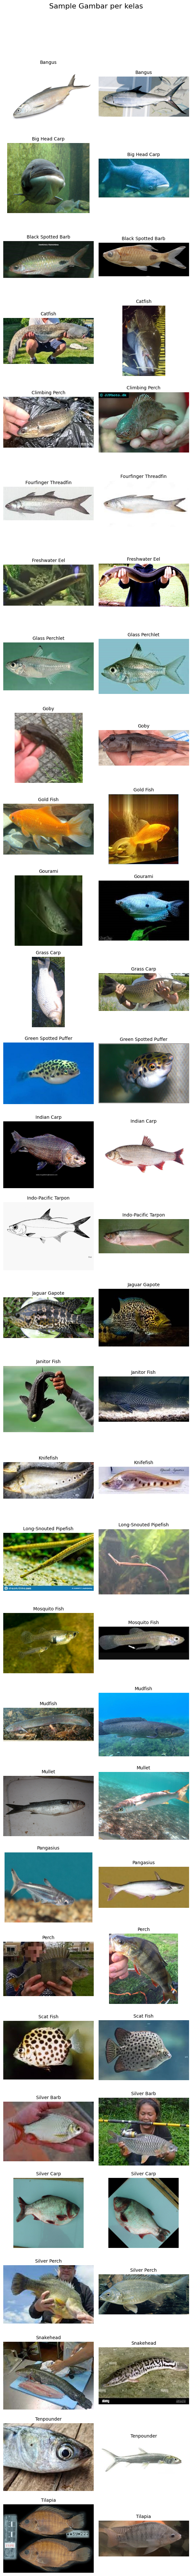

In [9]:
plt.figure(figsize=(num_examples_per_class * 3, len(categories) * 2.5))
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_dir, category)
    image_files = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]
    if image_files:
        example_images = random.sample(image_files, min(num_examples_per_class, len(image_files)))
        for j, img_file in enumerate(example_images):
            img_path = os.path.join(category_path, img_file)
            try:
                img = Image.open(img_path)
                plt.subplot(len(categories), num_examples_per_class, i * num_examples_per_class + j + 1)
                plt.imshow(img)
                plt.title(f"{category}", fontsize=10)
                plt.axis('off')
            except Exception as e:
                print(f"Error membuka gambar {img_path}: {e}")
plt.tight_layout()
plt.suptitle("Sample Gambar per kelas", fontsize=16, y=1.02)
plt.show()

### Distribusi Ukuran Gambar Secara Keseluruhan

In [10]:
from PIL import Image

In [11]:
# Path dataset train
dataset_dir = "./FishImgDataset/train"

image_dimensions = []
categories = sorted([d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))])

In [12]:
print("Mulai mengumpulkan dimensi gambar...")
for category in categories:
    category_path = os.path.join(dataset_dir, category)
    if os.path.isdir(category_path):
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            if os.path.isfile(image_path):
                try:
                    with Image.open(image_path) as img:
                        width, height = img.size
                        image_dimensions.append({'kategori': category, 'lebar': width, 'tinggi': height})
                except Exception as e:
                    print(f"Error saat membuka atau membaca dimensi gambar {image_path}: {e}")

print(f"Selesai mengumpulkan dimensi dari {len(image_dimensions)} gambar.")

Mulai mengumpulkan dimensi gambar...
Selesai mengumpulkan dimensi dari 8821 gambar.


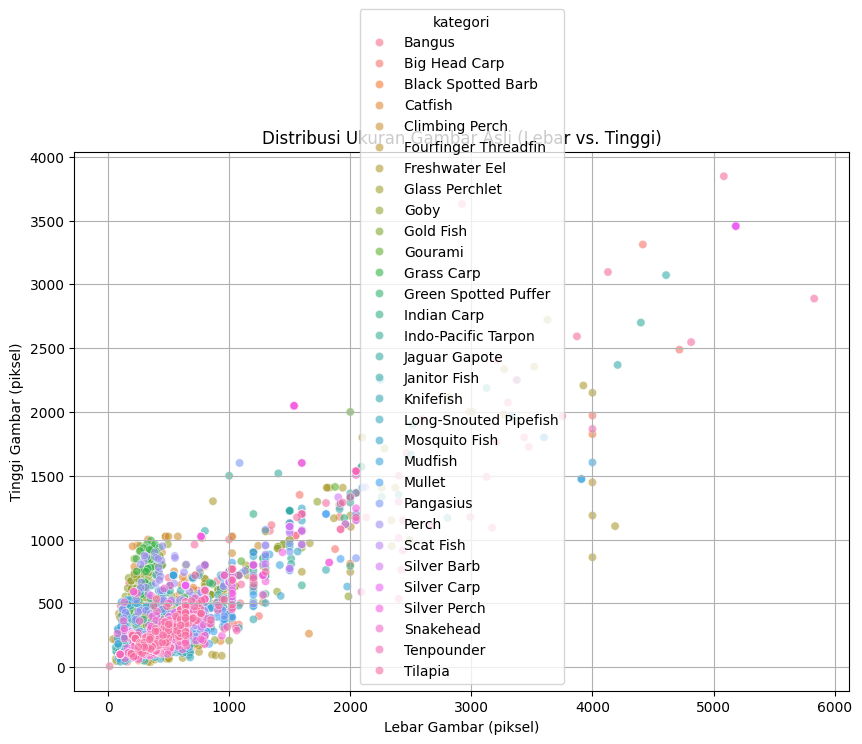

In [13]:
# Konversi ke DataFrame Pandas untuk kemudahan plotting
if image_dimensions:
    df_dimensions = pd.DataFrame(image_dimensions)

    # 1. Scatter Plot Lebar vs. Tinggi
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df_dimensions, x='lebar', y='tinggi', hue='kategori', alpha=0.6)
    plt.title('Distribusi Ukuran Gambar Asli (Lebar vs. Tinggi)')
    plt.xlabel('Lebar Gambar (piksel)')
    plt.ylabel('Tinggi Gambar (piksel)')
    plt.grid(True)
    plt.show()

else:
    print("Tidak ada dimensi gambar yang berhasil dikumpulkan. Pastikan path dataset benar dan berisi gambar.")

### Plot ukuran gambar tiap class

In [14]:
import math


In [15]:
# Path dataset train
dataset_dir = "./FishImgDataset/train"

image_dimensions = []
# Mengambil nama kategori (nama folder) secara otomatis dan mengurutkannya
categories = sorted([d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))])

In [16]:
print("Mulai mengumpulkan dimensi gambar...")
for category in categories:
    category_path = os.path.join(dataset_dir, category)
    # Pastikan itu adalah direktori
    if os.path.isdir(category_path):
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            # Pastikan itu adalah file
            if os.path.isfile(image_path):
                try:
                    with Image.open(image_path) as img:
                        width, height = img.size
                        image_dimensions.append({'kategori': category, 'lebar': width, 'tinggi': height})
                except Exception as e:
                    print(f"Error saat membuka atau membaca dimensi gambar {image_path}: {e}")

print(f"Selesai mengumpulkan dimensi dari {len(image_dimensions)} gambar.")

Mulai mengumpulkan dimensi gambar...
Selesai mengumpulkan dimensi dari 8821 gambar.



Membuat scatter plot ukuran gambar per kelas...


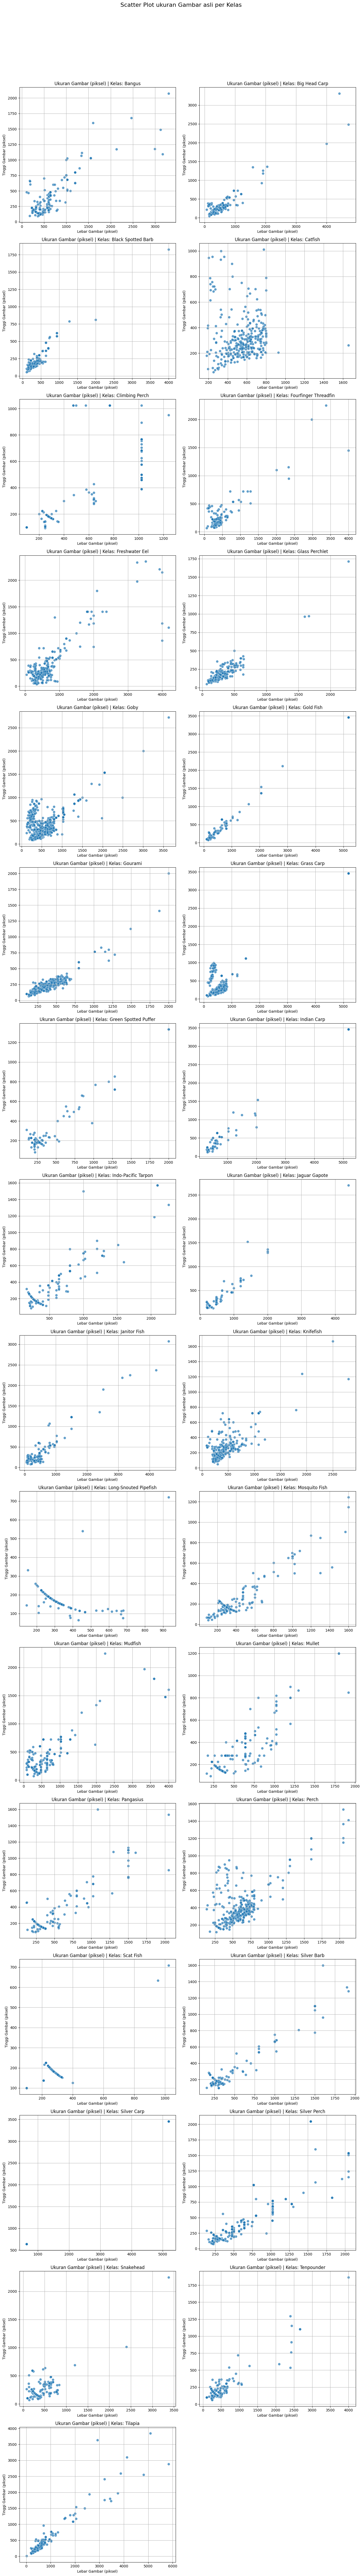


Statistik untuk Kelas: Bangus
             lebar       tinggi
count   171.000000   171.000000
mean    628.654971   385.409357
std     530.111069   322.667114
min     105.000000    91.000000
25%     314.500000   183.000000
50%     500.000000   240.000000
75%     640.000000   473.500000
max    3302.000000  2074.000000

Statistik untuk Kelas: Big Head Carp
             lebar       tinggi
count   201.000000   201.000000
mean    534.532338   308.706468
std     570.510841   350.561661
min      65.000000    42.000000
25%     276.000000   168.000000
50%     362.000000   209.000000
75%     588.000000   332.000000
max    4718.000000  3312.000000

Statistik untuk Kelas: Black Spotted Barb
             lebar       tinggi
count   200.000000   200.000000
mean    364.265000   213.035000
std     330.814398   160.972028
min     108.000000    55.000000
25%     250.750000   152.750000
50%     290.000000   182.000000
75%     389.000000   212.250000
max    4000.000000  1826.000000

Statistik untuk Kelas: 

In [17]:
if not image_dimensions:
    print("Tidak ada data dimensi gambar yang ditemukan. Pastikan path dataset benar.")
else:
    df_dimensions = pd.DataFrame(image_dimensions)

    # Mendapatkan daftar unik kategori/kelas dari DataFrame
    unique_categories = df_dimensions['kategori'].unique()
    num_categories = len(unique_categories)

    # Menentukan tata letak subplot (misalnya, 2 kolom)
    ncols = 2
    nrows = math.ceil(num_categories / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(7 * ncols, 6 * nrows))
    axes = axes.flatten()

    print("\nMembuat scatter plot ukuran gambar per kelas...")
    for i, category in enumerate(unique_categories):
        ax = axes[i]
        category_data = df_dimensions[df_dimensions['kategori'] == category]

        if not category_data.empty:
            sns.scatterplot(data=category_data, x='lebar', y='tinggi', ax=ax, alpha=0.7, s=50) # s untuk ukuran titik
            ax.set_title(f'Ukuran Gambar (piksel) | Kelas: {category}')
            ax.set_xlabel('Lebar Gambar (piksel)')
            ax.set_ylabel('Tinggi Gambar (piksel)')
            ax.grid(True)
        else:
            ax.set_title(f'Tidak ada data untuk Kelas: {category}')
            ax.axis('off')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.suptitle("Scatter Plot ukuran Gambar asli per Kelas", fontsize=16, y=1.03) # Judul utama
    plt.show()

    # Menampilkan statistik deskriptif untuk setiap kelas jika diinginkan
    for category in unique_categories:
        print(f"\nStatistik untuk Kelas: {category}")
        print(df_dimensions[df_dimensions['kategori'] == category][['lebar', 'tinggi']].describe())

Folder kelas yang dipilih secara acak: 'Big Head Carp'
Menggunakan gambar contoh acak: ./FishImgDataset/train\Big Head Carp\Big Head Carp 93.jpg


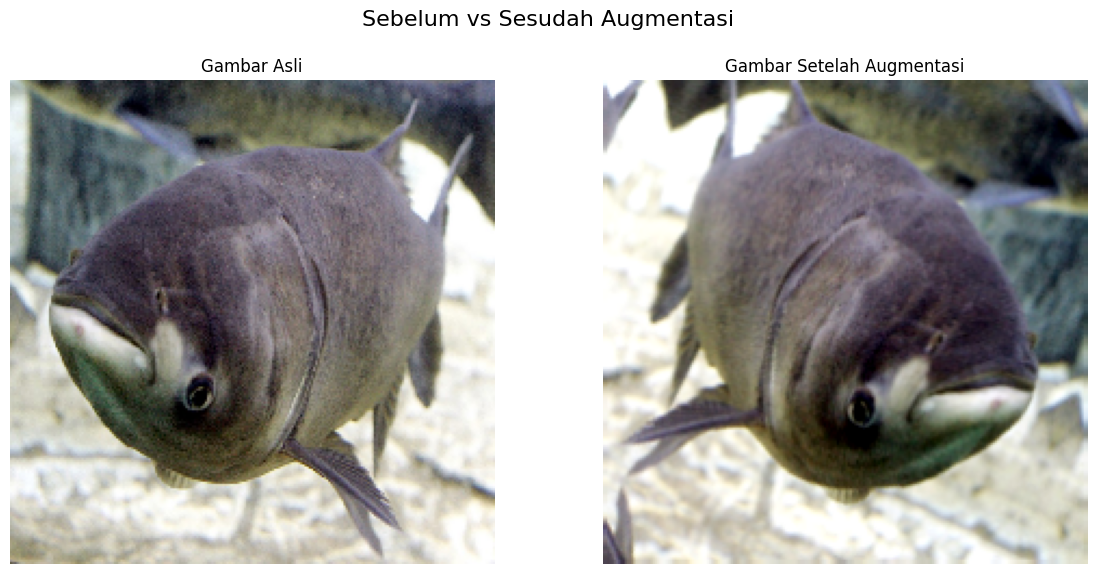

In [18]:
# Import fungsi yang diperlukan
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# --- Path ke Dataset ---
path_dataset = './FishImgDataset/train'
example_image_path = None

# --- Logika untuk Mendapatkan Path Gambar Contoh Secara Acak ---
if not os.path.exists(path_dataset):
    print(f"Error: Folder dataset training tidak ditemukan di '{path_dataset}'")
else:
    # 1. Dapatkan daftar semua folder kelas yang valid
    try:
        all_items = os.listdir(path_dataset)
        kelas_folders = [
            item for item in all_items
            if os.path.isdir(os.path.join(path_dataset, item)) and not item.startswith('.') # Hindari folder tersembunyi
        ]
    except Exception as e:
        print(f"Error saat mengakses direktori kelas: {e}")
        kelas_folders = []


    if kelas_folders:
        # 2. Pilih folder kelas secara acak
        selected_kelas_folder_name = random.choice(kelas_folders)
        path_ke_selected_kelas_folder = os.path.join(path_dataset, selected_kelas_folder_name)
        print(f"Folder kelas yang dipilih secara acak: '{selected_kelas_folder_name}'")

        # 3. Dapatkan daftar semua file gambar yang valid di dalam folder kelas yang dipilih
        try:
            items_in_class_folder = os.listdir(path_ke_selected_kelas_folder)
            image_files = [
                item for item in items_in_class_folder
                if os.path.isfile(os.path.join(path_ke_selected_kelas_folder, item)) and \
                   item.lower().endswith(('.jpg', '.jpeg', '.png')) # Filter ekstensi gambar umum
            ]
        except Exception as e:
            print(f"Error saat mengakses file gambar di {path_ke_selected_kelas_folder}: {e}")
            image_files = []

        if image_files:
            # 4. Pilih file gambar secara acak dari folder kelas tersebut
            selected_image_name = random.choice(image_files)
            example_image_path = os.path.join(path_ke_selected_kelas_folder, selected_image_name)
        else:
            print(f"Tidak ada file gambar yang valid ditemukan di folder kelas yang dipilih: '{path_ke_selected_kelas_folder}'")
    else:
        print(f"Tidak ada folder kelas (direktori) yang valid ditemukan di '{path_dataset}'")

# --- Memuat dan Memproses Gambar Jika Path Valid ---
if example_image_path and os.path.exists(example_image_path):
    print(f"Menggunakan gambar contoh acak: {example_image_path}")
    img_height, img_width = 224, 224

    # Muat gambar contoh
    img = load_img(example_image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)

    # Definisikan pipeline augmentasi Anda (sama seperti sebelumnya)
    data_augmentation_pipeline = tf.keras.Sequential([
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2),
        tf.keras.layers.RandomContrast(factor=0.2)
    ])

    # Terapkan augmentasi
    augmented_img_batch = data_augmentation_pipeline(img_batch, training=True)
    augmented_image = augmented_img_batch[0].numpy().astype('uint8')

    # Tampilkan gambar asli dan gambar yang di-augmentasi
    plt.figure(figsize=(12, 6))

    # Gambar Asli
    plt.subplot(1, 2, 1)
    plt.imshow(img_array.astype('uint8'))
    plt.title('Gambar Asli')
    plt.axis('off')

    # Gambar Setelah Augmentasi
    plt.subplot(1, 2, 2)
    plt.imshow(augmented_image)
    plt.title('Gambar Setelah Augmentasi')
    plt.axis('off')

    plt.suptitle('Sebelum vs Sesudah Augmentasi', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## Klasifikasi MobileNetV2

In [19]:
from tensorflow.keras.layers import RandomFlip, RandomRotation,Rescaling
from tensorflow.keras.applications import MobileNetV2

In [20]:
img_height, img_width = 224, 224
batch_size = 16

# Define your augmentation layers
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(factor=0.2)
])

In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "./FishImgDataset/train",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "./FishImgDataset/val",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "./FishImgDataset/test",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

Found 8819 files belonging to 31 classes.
Found 2751 files belonging to 31 classes.
Found 1761 files belonging to 31 classes.


In [22]:
from tensorflow.keras import regularizers

In [23]:
base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

# Freeze the base MobileNetV2 layers
base_model.trainable = False

# Hitung jumlah kelas dari folder train
num_classes = len(os.listdir('./FishImgDataset/train'))
print(f"Jumlah kelas ikan: {num_classes}")

model = tf.keras.Sequential([
    Rescaling(1./255),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(224, activation='relu', kernel_regularizer=regularizers.l2(0.001)), # TAMBAHKAN L2 REGULARIZER
    tf.keras.layers.Dropout(0.5), # Dropout bisa dikombinasikan dengan L2
    tf.keras.layers.Dense(num_classes, kernel_regularizer=regularizers.l2(0.001)) # JUMLAH CLASS
])

Jumlah kelas ikan: 31


In [24]:
# Display the summary of the base model
base_model.summary()

# Count and print the types of layers
layer_types = {}
for layer in base_model.layers:
    layer_type = layer.__class__.__name__
    if layer_type not in layer_types:
        layer_types[layer_type] = 1
    else:
        layer_types[layer_type] += 1

# Print the count of each type of layer
for layer_type, count in layer_types.items():
    print(f"{layer_type}: {count}")

# Print the total number of layers
print(f"\nTotal number of layers in MobileNetV2: {len(base_model.layers)}")

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

InputLayer: 1
Conv2D: 35
BatchNormalization: 52
ReLU: 35
DepthwiseConv2D: 17
ZeroPadding2D: 4
Add: 10

Total number of layers in MobileNetV2: 154


In [25]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metrik yang dipantau
    patience= 4,         # Jumlah epoch tanpa peningkatan sebelum berhenti (misalnya 5-10)
    restore_best_weights=True  # Mengembalikan bobot model terbaik
)

In [28]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 162s 282ms/step - accuracy: 0.4372 - loss: 2.3860 - val_accuracy: 0.6939 - val_loss: 1.3686
Epoch 2/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 148s 267ms/step - accuracy: 0.6125 - loss: 1.6372 - val_accuracy: 0.7597 - val_loss: 1.1372
Epoch 3/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 153s 277ms/step - accuracy: 0.6547 - loss: 1.4701 - val_accuracy: 0.7844 - val_loss: 1.0374
Epoch 4/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 171s 309ms/step - accuracy: 0.6642 - loss: 1.4173 - val_accuracy: 0.7892 - val_loss: 1.0402
Epoch 5/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 169s 305ms/step - accuracy: 0.6784 - loss: 1.3723 - val_accuracy: 0.8110 - val_loss: 0.9877
Epoch 6/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 166s 299ms/step - accuracy: 0.6958 - loss: 1.3312 - val_accuracy: 0.8073 - val_loss: 0.9838
Epoch 7/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 158s 286ms/step - accuracy: 0.7067 - loss: 1.2964 - val_accuracy: 0.8153 - val_loss: 0.9390
Epoch 8/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 198s 278ms/step - accuracy: 0.7090 -

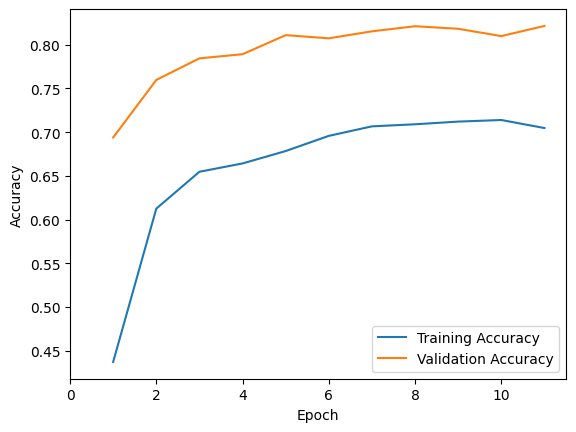

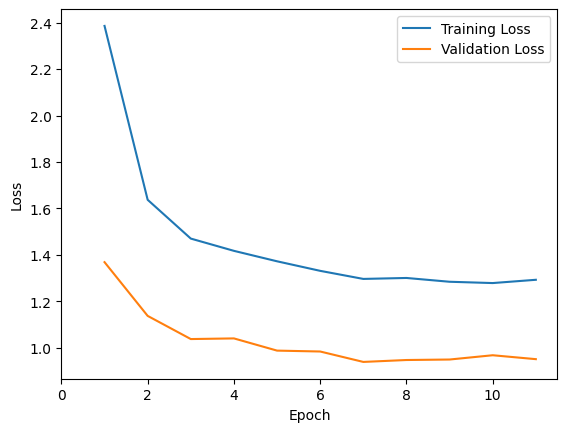

In [29]:
actual_epochs = len(history.history['accuracy'])
epochs = range(1, actual_epochs + 1)

# Plot training and validation accuracy
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# Adjust x-ticks based on the actual number of epochs, with steps of 2
plt.xticks(np.arange(0, actual_epochs + 1, step=2))
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# Adjust x-ticks based on the actual number of epochs, with steps of 2
plt.xticks(np.arange(0, actual_epochs + 1, step=2))
plt.legend()
plt.show()

In [30]:
#model testing
model.evaluate(test_ds)

111/111 ━━━━━━━━━━━━━━━━━━━━ 26s 233ms/step - accuracy: 0.8143 - loss: 0.9568


[0.956795334815979, 0.8143100738525391]

In [31]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

#export
with open("mobilenet_v2.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\fasya\AppData\Local\Temp\tmpiqcwqht_\assets


INFO:tensorflow:Assets written to: C:\Users\fasya\AppData\Local\Temp\tmpiqcwqht_\assets


Saved artifact at 'C:\Users\fasya\AppData\Local\Temp\tmpiqcwqht_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_164')
Output Type:
  TensorSpec(shape=(None, 31), dtype=tf.float32, name=None)
Captures:
  2954129499984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2954129501712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2954129501904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2954129500560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2954129500176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2954129502864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2954129503248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2954129503632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2954129503440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2954129496720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [33]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="./mobilenet_v2.tflite")
interpreter.allocate_tensors()

c:\Users\fasya\tensorflow\tf-env\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [34]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [35]:
image_size = 224

In [36]:
def preprocess_image(image_path):
    # Load and preprocess the image
    image = Image.open(image_path)
    # Ensure the image is in RGB format (3 channels)
    image = image.convert('RGB')
    image = image.resize((image_size, image_size))
    image = np.array(image).astype('float32')
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

In [37]:
def classify_image(image_path):
    # Preprocess the image
    input_data = preprocess_image(image_path)

    # Set the tensor to point to the input data to be inferred
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run the interpreter
    interpreter.invoke()

    # Get the output
    output_data = interpreter.get_tensor(output_details[0]['index'])
    confidences = np.squeeze(output_data)

    # Get the index of the highest confidence score
    max_pos = np.argmax(confidences)
    max_confidence = confidences[max_pos]

    # Fish species classes (must match the labels used below)
    classes = sorted([
        "Bangus",
        "Big Head Carp",
        "Black Spotted Barb",
        "Catfish",
        "Climbing Perch",
        "Fourfinger Threadfin",
        "Freshwater Eel",
        "Glass Perchlet",
        "Goby",
        "Gold Fish",
        "Gourami",
        "Grass Carp",
        "Green Spotted Puffer",
        "Indian Carp",
        "Indo-Pacific Tarpon",
        "Jaguar Gapote",
        "Janitor Fish",
        "Knifefish",
        "Long-Snouted Pipefish",
        "Mosquito Fish",
        "Mudfish",
        "Mullet",
        "Pangasius",
        "Perch",
        "Scat Fish",
        "Silver Barb",
        "Silver Carp",
        "Silver Perch",
        "Snakehead",
        "Tenpounder",
        "Tilapia",
    ])

    return classes[max_pos], max_pos


In [38]:
labels = sorted([
    "Bangus",
    "Big Head Carp",
    "Black Spotted Barb",
    "Catfish",
    "Climbing Perch",
    "Fourfinger Threadfin",
    "Freshwater Eel",
    "Glass Perchlet",
    "Goby",
    "Gold Fish",
    "Gourami",
    "Grass Carp",
    "Green Spotted Puffer",
    "Indian Carp",
    "Indo-Pacific Tarpon",
    "Jaguar Gapote",
    "Janitor Fish",
    "Knifefish",
    "Long-Snouted Pipefish",
    "Mosquito Fish",
    "Mudfish",
    "Mullet",
    "Pangasius",
    "Perch",
    "Scat Fish",
    "Silver Barb",
    "Silver Carp",
    "Silver Perch",
    "Snakehead",
    "Tenpounder",
    "Tilapia",
])

y_true = []
y_pred = []


In [39]:
validation_directory = "./FishImgDataset/test"


In [40]:
for label in labels:
    label_dir = os.path.join(validation_directory, label)
    if os.path.isdir(label_dir):
        for image_name in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_name)
            if os.path.isfile(image_path):
                actual_class_index = labels.index(label)
                predicted_label, predicted_class_index = classify_image(image_path)
                y_true.append(actual_class_index)
                y_pred.append(predicted_class_index)


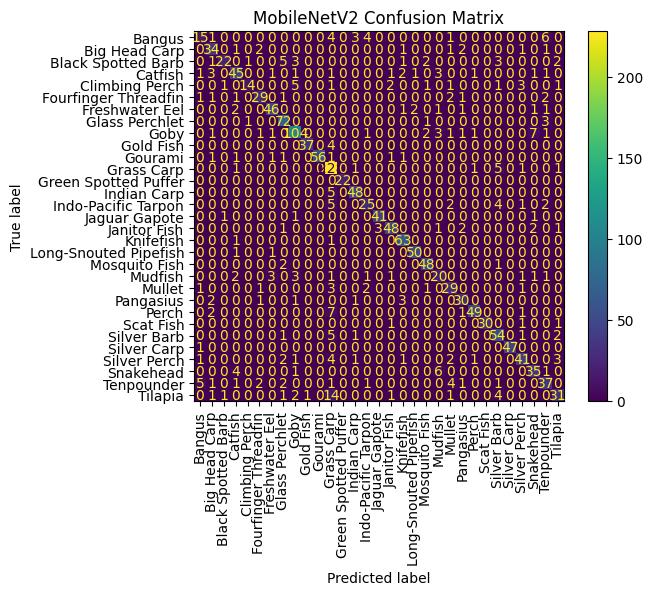

In [41]:
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation='vertical')
plt.title("MobileNetV2 Confusion Matrix")
plt.show()

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

### Metric Evaluasi

#### Akurasi

Metrik ini mengukur proporsi prediksi yang benar dari keseluruhan jumlah data. Dengan kata lain, seberapa sering model menebak dengan benar

In [42]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.8233957978421351


#### Presisi

Presisi mengukur seberapa banyak instance yang diprediksi sebagai positif benar-benar positif.

In [43]:
print(f'Precision: {precision}')

Precision: 0.826454565665992


#### Recall (Sensitivity atau True Positive Rate)

Recall mengukur seberapa banyak instance positif yang berhasil diidentifikasi dengan benar oleh model

In [44]:
print(f'Recall: {recall}')

Recall: 0.79461563770607


#### F1 Score

F1 Score adalah nilai yang menunjukkan seberapa baik model dalam menemukan hasil yang benar dan menghindari yang salah. Ini menggabungkan presisi dan recall, jadi cocok dipakai kalau keduanya sama-sama penting.

In [45]:
print(f'F1 Score: {f1}')

F1 Score: 0.8050748284559165


## Klasifikasi MobileNet

In [46]:
from tensorflow.keras.applications import MobileNet

In [47]:
img_height, img_width = 224, 224
batch_size = 16

# Define your augmentation layers
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(factor=0.2)
])

In [48]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "./FishImgDataset/train",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "./FishImgDataset/val",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "./FishImgDataset/test",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

Found 8819 files belonging to 31 classes.
Found 2751 files belonging to 31 classes.
Found 1761 files belonging to 31 classes.


In [49]:
base_model = MobileNet(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

# Freeze the base MobileNet layers
base_model.trainable = False

# Hitung jumlah kelas dari folder train
num_classes = len(os.listdir('./FishImgDataset/train'))
print(f"Jumlah kelas ikan: {num_classes}")

model = tf.keras.Sequential([
    Rescaling(1./255),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(224, activation='relu', kernel_regularizer=regularizers.l2(0.001)), # TAMBAHKAN L2 REGULARIZER
    tf.keras.layers.Dropout(0.5), # Dropout bisa dikombinasikan dengan L2
    tf.keras.layers.Dense(num_classes, kernel_regularizer=regularizers.l2(0.001)) # JUMLAH CLASS
])

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Jumlah kelas ikan: 31


In [50]:
# Display the summary of the base model
base_model.summary()

# Count and print the types of layers
layer_types = {}
for layer in base_model.layers:
    layer_type = layer.__class__.__name__
    if layer_type not in layer_types:
        layer_types[layer_type] = 1
    else:
        layer_types[layer_type] += 1

# Print the count of each type of layer
for layer_type, count in layer_types.items():
    print(f"{layer_type}: {count}")

# Print the total number of layers
print(f"\nTotal number of layers in MobileNet: {len(base_model.layers)}")

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

InputLayer: 1
Conv2D: 14
BatchNormalization: 27
ReLU: 27
DepthwiseConv2D: 13
ZeroPadding2D: 4

Total number of layers in MobileNet: 86


In [51]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [52]:
# Train the model
history_mobilenet = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 149s 264ms/step - accuracy: 0.4469 - loss: 2.3255 - val_accuracy: 0.7485 - val_loss: 1.2255
Epoch 2/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 139s 252ms/step - accuracy: 0.6249 - loss: 1.5329 - val_accuracy: 0.7913 - val_loss: 0.9829
Epoch 3/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 151s 272ms/step - accuracy: 0.6856 - loss: 1.3152 - val_accuracy: 0.8299 - val_loss: 0.8617
Epoch 4/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 202s 273ms/step - accuracy: 0.7074 - loss: 1.2349 - val_accuracy: 0.8110 - val_loss: 0.8912
Epoch 5/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 149s 270ms/step - accuracy: 0.7094 - loss: 1.2221 - val_accuracy: 0.8248 - val_loss: 0.8703
Epoch 6/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 150s 271ms/step - accuracy: 0.7183 - loss: 1.1952 - val_accuracy: 0.8582 - val_loss: 0.7884
Epoch 7/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 138s 249ms/step - accuracy: 0.7298 - loss: 1.1503 - val_accuracy: 0.8633 - val_loss: 0.7595
Epoch 8/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 142s 256ms/step - accuracy: 0.7332 -

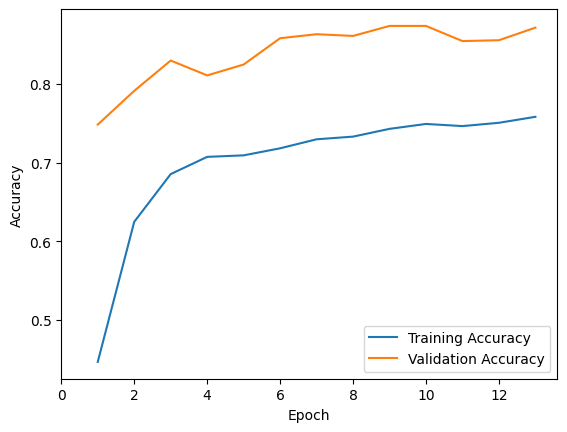

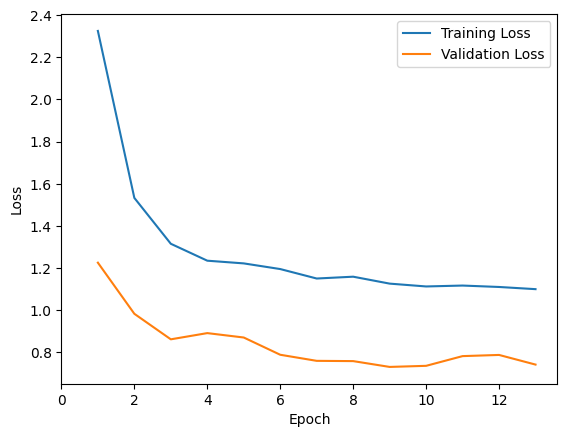

In [53]:
actual_epochs = len(history_mobilenet.history['accuracy'])
epochs = range(1, actual_epochs + 1)

# Plot training and validation accuracy
plt.plot(epochs, history_mobilenet.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# Adjust x-ticks based on the actual number of epochs, with steps of 2
plt.xticks(np.arange(0, actual_epochs + 1, step=2))
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(epochs, history_mobilenet.history['loss'], label='Training Loss')
plt.plot(epochs, history_mobilenet.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# Adjust x-ticks based on the actual number of epochs, with steps of 2
plt.xticks(np.arange(0, actual_epochs + 1, step=2))
plt.legend()
plt.show()

In [54]:
#model testing
model.evaluate(test_ds)

111/111 ━━━━━━━━━━━━━━━━━━━━ 23s 206ms/step - accuracy: 0.8580 - loss: 0.7628


[0.7627866268157959, 0.8580352067947388]

In [55]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

#export
with open("MobileNet.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\fasya\AppData\Local\Temp\tmpxpv0vfm9\assets


INFO:tensorflow:Assets written to: C:\Users\fasya\AppData\Local\Temp\tmpxpv0vfm9\assets


Saved artifact at 'C:\Users\fasya\AppData\Local\Temp\tmpxpv0vfm9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_262')
Output Type:
  TensorSpec(shape=(None, 31), dtype=tf.float32, name=None)
Captures:
  2954129494416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2954039657488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2954129495760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2954037688080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2954037687504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2954039664016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2954366944464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2954366944848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2954039665744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2954039665552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  

In [56]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="./MobileNet.tflite")
interpreter.allocate_tensors()

c:\Users\fasya\tensorflow\tf-env\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [57]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [58]:
image_size = 224

In [59]:
def preprocess_image(image_path):
    # Load and preprocess the image
    image = Image.open(image_path)
    # Ensure the image is in RGB format (3 channels)
    image = image.convert('RGB')
    image = image.resize((image_size, image_size))
    image = np.array(image).astype('float32')
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

In [60]:
def classify_image(image_path):
    # Preprocess the image
    input_data = preprocess_image(image_path)

    # Set the tensor to point to the input data to be inferred
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run the interpreter
    interpreter.invoke()

    # Get the output
    output_data = interpreter.get_tensor(output_details[0]['index'])
    confidences = np.squeeze(output_data)

    # Get the index of the highest confidence score
    max_pos = np.argmax(confidences)
    max_confidence = confidences[max_pos]

    # Ambil classes dari folder train
    classes = sorted(os.listdir('./FishImgDataset/train'))

    return classes[max_pos], max_pos

In [61]:
validation_directory = "./FishImgDataset/test"

In [62]:
# Ambil labels dari folder train
labels = sorted(os.listdir('./FishImgDataset/train'))

y_true = []
y_pred = []

In [63]:
for label in labels:
    label_dir = os.path.join(validation_directory, label)
    if os.path.isdir(label_dir):
        for image_name in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_name)
            if os.path.isfile(image_path):
                actual_class_index = labels.index(label)
                predicted_label, predicted_class_index = classify_image(image_path)
                y_true.append(actual_class_index)
                y_pred.append(predicted_class_index)


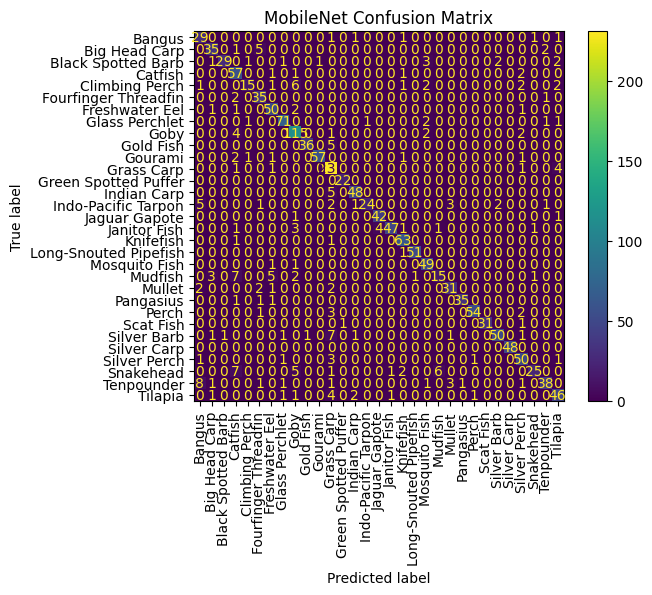

In [64]:
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation='vertical')
plt.title("MobileNet Confusion Matrix")
plt.show()

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

### Metric Evaluasi

#### Akurasi


Metrik ini mengukur proporsi prediksi yang benar dari keseluruhan jumlah data. Dengan kata lain, seberapa sering model menebak dengan benar


In [65]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.8682566723452584


#### Presisi

Presisi mengukur seberapa banyak instance yang diprediksi sebagai positif benar-benar positif.


In [66]:
print(f'Precision: {precision}')


Precision: 0.8768002696329813


#### Recall (Sensitivity atau True Positive Rate)

Recall mengukur seberapa banyak instance positif yang berhasil diidentifikasi dengan benar oleh model


In [67]:
print(f'Recall: {recall}')


Recall: 0.8430441352913711


#### F1 Score


F1 Score adalah nilai yang menunjukkan seberapa baik model dalam menemukan hasil yang benar dan menghindari yang salah. Ini menggabungkan presisi dan recall, jadi cocok dipakai kalau keduanya sama-sama penting.

In [68]:
print(f'F1 Score: {f1}')


F1 Score: 0.8514317325243838


## Model Comparison / Perbandingan Model

### Arsitektur Utama

**MobileNetV2**

Inverted Residuals + Linear Bottlenecks

**MobileNet**

Depthwise Separable Convolutions


### Jumlah Layer

**MobileNetV2**

Total number of layers in MobileNetV2: 154

**MobileNet**

Total number of layers in MobileNet: 86


### Confusion Matrix

**MobileNetV2**

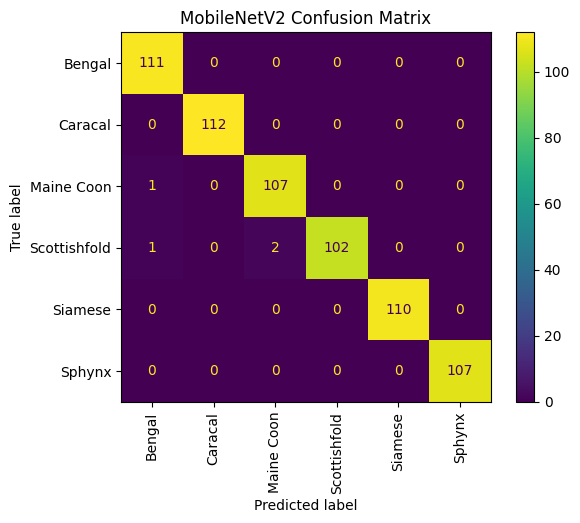

**MobileNet**

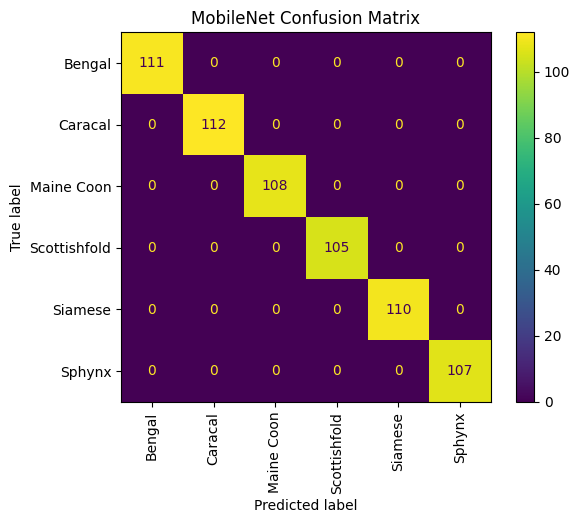


### Akurasi


**MobileNetV2**
*   Precision: 0.9939920435170903
*   Recall: 0.993694885361552
*   F1 Score: 0.9937922983592689

**MobileNet**
*   Precision: 1.0
*   Recall: 1.0
*   F1 Score: 1.0




### Kelebihan

**MobileNetV2**

Lebih efisien, cocok untuk perangkat mobile

**MobileNet**

Sederhana, mudah diimplementasikan


### Kekurangan

**MobileNetV2**

Lebih kompleks secara arsitektur

**MobileNet**

Kurang efisien dalam layer yang dalam


## Kesimpulan

Dalam proyek klasifikasi gambar jenis kucing , MobileNet terbukti lebih efektif daripada MobileNetV2, kemungkinan besar karena model yang lebih ringan lebih cocok untuk dataset berukuran kecil atau sedang. Ini menunjukkan pentingnya eksperimen langsung, dan bahwa hasil terbaik sering kali bergantung pada konteks dataset dan strategi training, bukan hanya teori arsitektur.